# Box Model Examples

## Comparison with analytical solutions
In this example, we initialize the model and run some tests alongside analytical solutions from Scott (1968) and Feingold et al. (1988). In order to use the model, we first need to import the spectral_1d class from the spectral_model module.

In [1]:
from binmod1d.spectral_model import spectral_1d

Now we can test the model against known analytical solutions in a box model setup. 

### Scott (1968) Solutions

We'll start with the series solutions provided by Scott (1968).

#### The Golovin Solution: $K(x,y) = \overline{E} (x+y)$
By default, the spectral bin model is set up to replicate the Scott (1968) solutions with the Golovin (summation) kernel and $\mu=3$ . Therefore, we can simply initialize a spectral_1d model as follows:

In [2]:
s4_golovin = spectral_1d(gam_norm=True)

We can plot the initial distribution using the plot_init() method. This is a good way to make sure you have enough bins to cover the range of particle mass/sizes that will be needed appropriately resolve the collision-coalescence/breakup process for a given initial distribution and parameters.

(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='dN/dlog(m)'>,
        <Axes: xlabel='log(m) [log(g)]', ylabel='dM/dlog(m)'>],
       dtype=object))

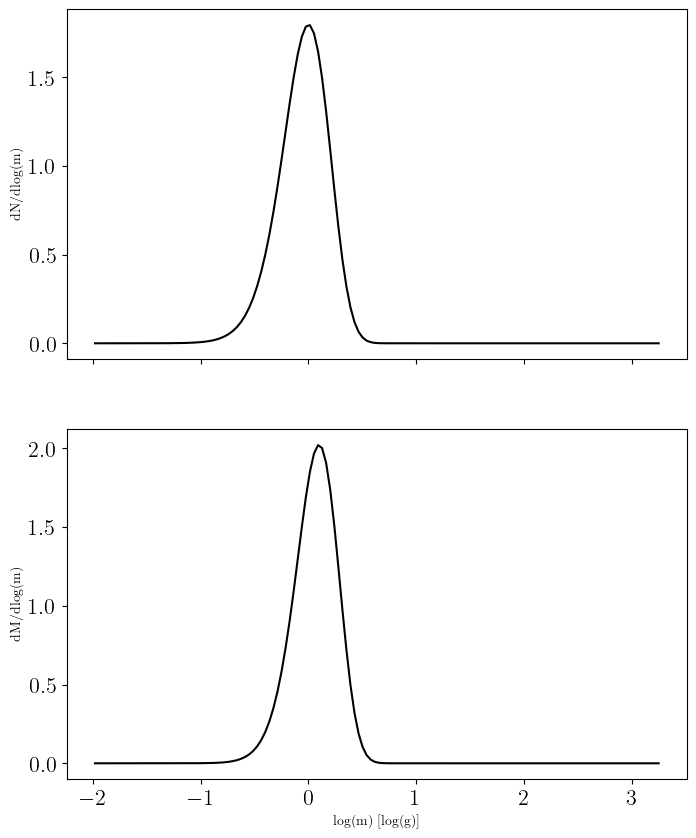

In [3]:
s4_golovin.plot_init()

Now we can run the model as a box model by using the spectral_1d run method

In [4]:
s4_golovin.run()

Running 1D spectral bin model:   0%|          | 0/400 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.26 min


Now we can plot the results for the last time period by using the plot_dists method and compare with W. D. Scott's analytical solution. The $t_{ind}$ parameter in the plot_dists method can be used to select the time index you would like to plot (following python convention, $t_{ind}=-1$ takes the last available time). To enable the plotting of the analytical solution as a red dotted line, use the scott_solution input.

Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='dN/dlog(m)'>,
        <Axes: xlabel='log(m) [log(g)]', ylabel='dM/dlog(m)'>],
       dtype=object))

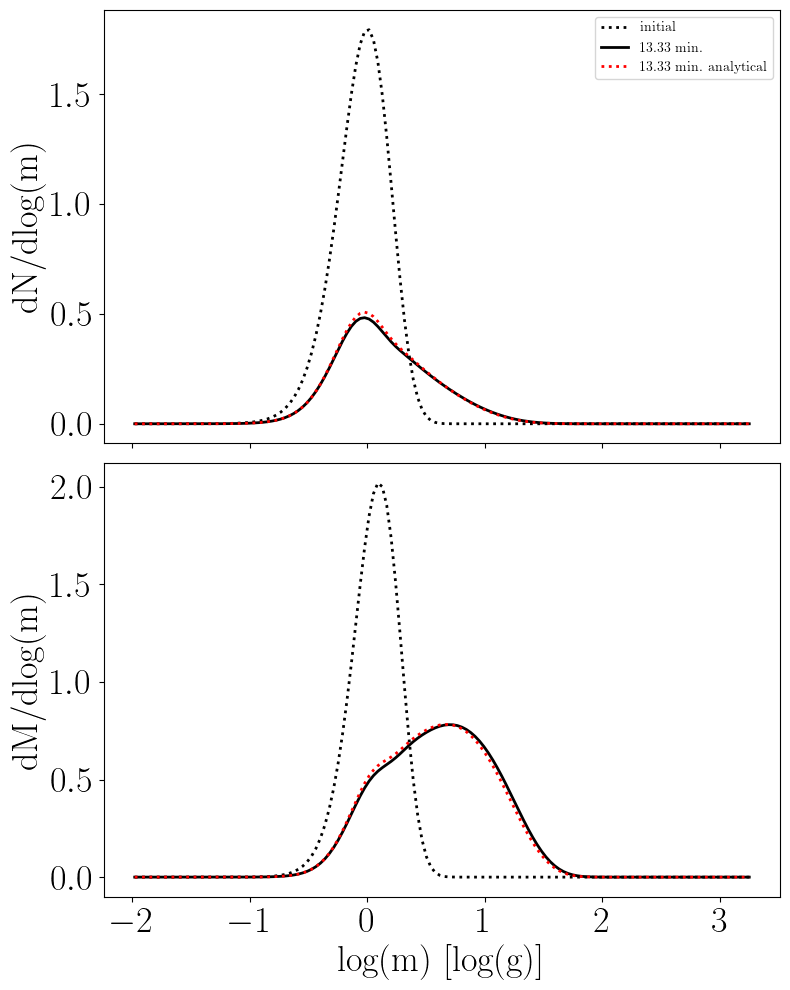

In [5]:
s4_golovin.plot_dists(tind=-1,scott_solution=True)

### The Product Kernel Solution: $K(x,y) = \overline{E}\, x\, y$
Now, we'll test the product kernel solution. Keep in mind that the product kernel does not strictly conserve mass once gellation occurs (see Alfonso et al. 2008, for a discussion on this: www.atmos-chem-phys.net/8/969/2008/). Actually, according to Alfonso et al. 2008, the Golovin kernel also does not conserve mass after a certain amount of time but this unphysical behavior is much more pronounced with the fat-tailed distribution resulting from using the product kernel. Again, let's do $\mu=3$ and $t_{\max}=400$. Also, let's modify $x_{0}$ so that the extended tail of the product kernel solution is better resolved.

Running 1D spectral bin model:   0%|          | 0/200 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.18 min
Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='dN/dlog(m)'>,
        <Axes: xlabel='log(m) [log(g)]', ylabel='dM/dlog(m)'>],
       dtype=object))

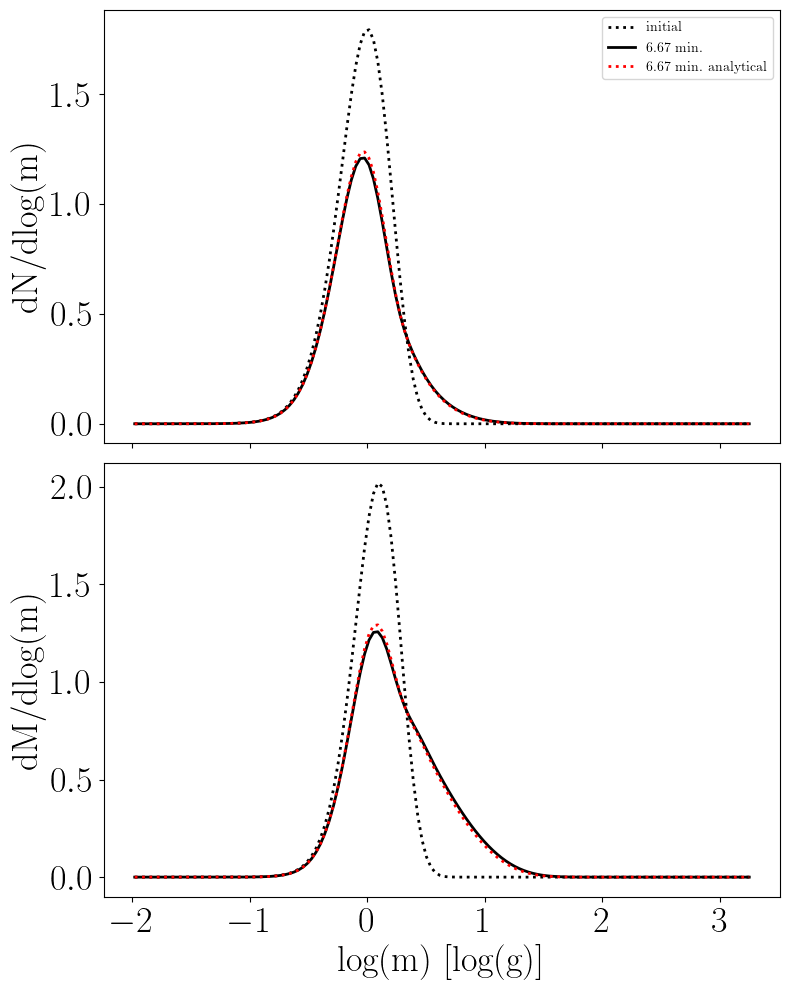

In [6]:
s8_product = spectral_1d(kernel='Product',sbin=8,bins=140,gam_norm=True,tmax=400.,x0=0.01)
s8_product.run()
s8_product.plot_dists(tind=-1,scott_solution=True)

### The Constant Kernel Solution: $K(x,y)=\overline{E}$
Finally, we'll do the constant kernel. The plotting of the analytical solution takes a little bit longer because some optimization is required for the saddle-point approximation when $x$ is large. 

Running 1D spectral bin model:   0%|          | 0/600 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.58 min
Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='dN/dlog(m)'>,
        <Axes: xlabel='log(m) [log(g)]', ylabel='dM/dlog(m)'>],
       dtype=object))

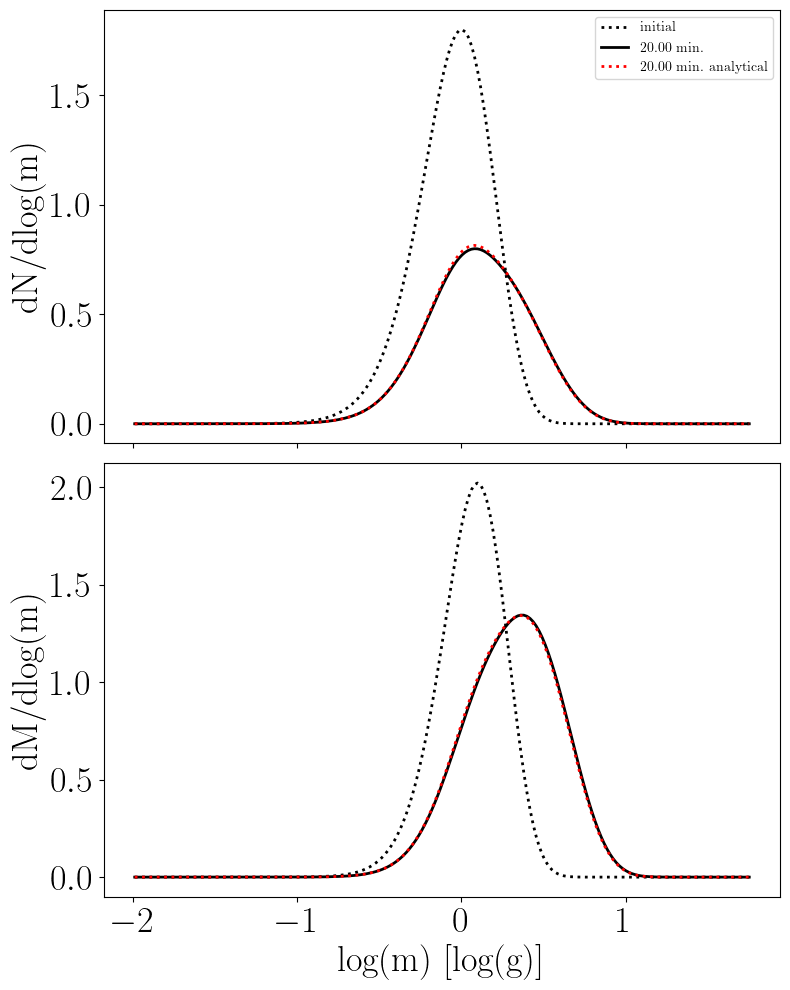

In [7]:
s16_constant = spectral_1d(kernel='Constant',sbin=16,bins=200,gam_norm=True,tmax=1200.,x0=0.01)
s16_constant.run()
s16_constant.plot_dists(tind=-1,scott_solution=True)

## Feingold et al. (1988) Solutions

Next we'll test the Collisional Breakup and Coalescence/Breakup steady-state analytical solutions in Feingold et al. (1988). We'll initialize a spectral_1d object as before but use the Eb parameter option to turn on collisional breakup. Also, we'll need to change the $x_{0}$ parameter so as to better resolve the low end of the particle size distribution.

### Breakup Solution

Running 1D spectral bin model:   0%|          | 0/400 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.39 min
Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='dN/dlog(m)'>,
        <Axes: xlabel='log(m) [log(g)]', ylabel='dM/dlog(m)'>],
       dtype=object))

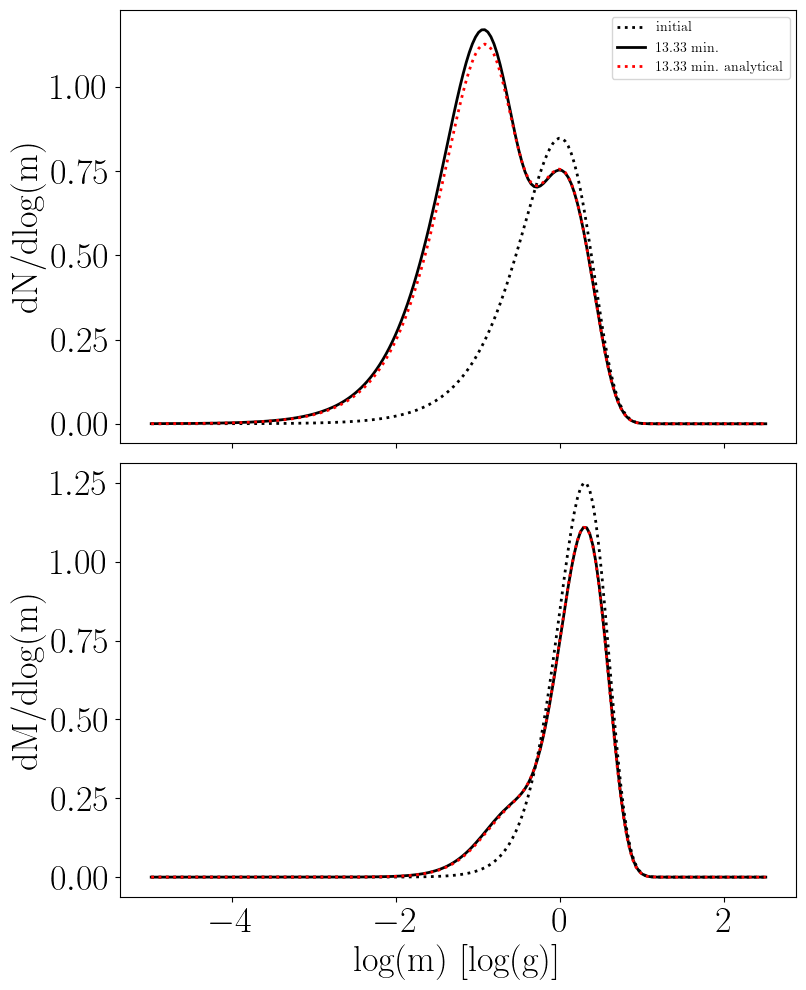

In [8]:
s8_breakup = spectral_1d(kernel='Constant',gam_norm=True,mu0=0.,sbin=8,bins=200,Eb=0.1,Es=0.,x0=0.00001)
s8_breakup.run()
s8_breakup.plot_dists(tind=-1,feingold_solution=True)

### Steady-state Collision-Coalescence/Breakup solution

Now we'll do both collision_coalescence and breakup and compare the solution at $t_{\max}=6000$ sec to the steady-state solution from Feingold et al. (1988). 

Running 1D spectral bin model:   0%|          | 0/3000 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.73 min
Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='dN/dlog(m)'>,
        <Axes: xlabel='log(m) [log(g)]', ylabel='dM/dlog(m)'>],
       dtype=object))

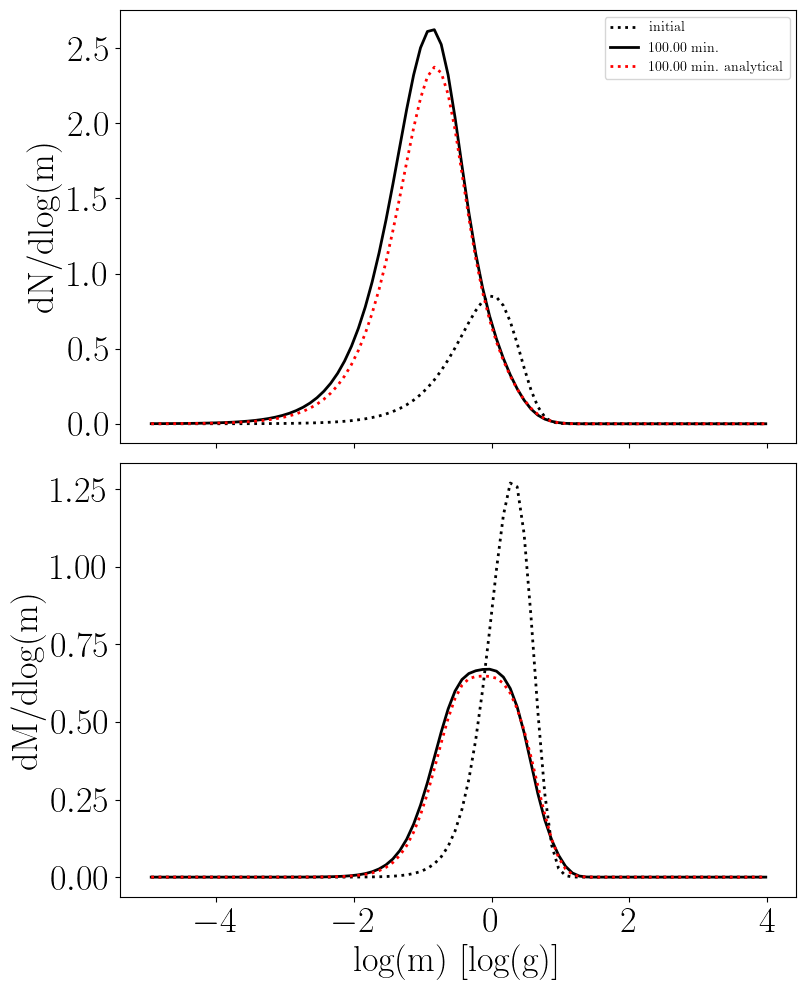

In [9]:
s3_BC = spectral_1d(kernel='Constant',gam_norm=True,sbin=3,bins=90,mu0=0.,tmax=6000,Ecol=0.001,Eb=1.0,Es=0.8,x0=0.00001)
s3_BC.run()
s3_BC.plot_dists(tind=-1,feingold_solution=True)

Notice that the Feingold solutions don't exactly match the model results regardless of resolution/bins. This is because, as explained in Feingold et al. (1988), the analytical solutions use a fragment distribution that doesn't exactly conserve collision-by-collision total mass (but does conserve overall mass for the entire distribution). Therefore the validity of the analytical solution is predicated on the chosen $\Lambda_{f}$ parameter (see the fragments function in the habits.py module). The bin model on the other hand does, by its nature, preserve collision-by-collision total mass.

### 2 Moment versus 1 moment tests

Now we'll test the 1 moment versus 2 moment calculations for the analytic tests. We'll run the Golovin case out to 1 hour for both sets of calculations.

In [10]:
s3_golovin_1mom = spectral_1d(sbin=3,bins=90,x0=0.001,tmax=3600,gam_norm=True,moments=1)
s3_golovin_2mom = spectral_1d(sbin=3,bins=90,x0=0.001,tmax=3600,gam_norm=True,moments=2)
s3_golovin_1mom.run()
s3_golovin_2mom.run()

Running 1D spectral bin model:   0%|          | 0/1800 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.29 min


Running 1D spectral bin model:   0%|          | 0/1800 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.54 min


Now let's plot both solutions at 1 hour. We can use the ```lstyle``` and ```lcolor``` parameters in ```plot_dists()``` to overlay the plots on each other. We'll also use the ```normbin``` parameter to normalize each distribution to unity so that we can better see the change in shape between the initial and final distributions. 

Plotting distributions...
Plotting distributions...


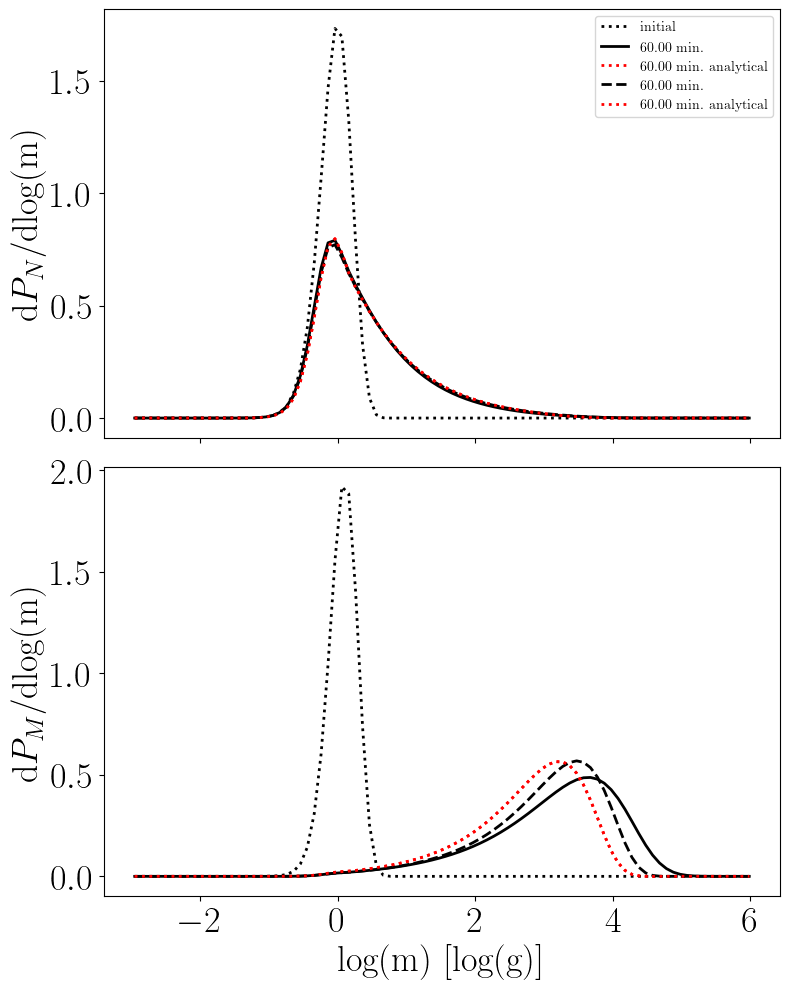

In [11]:
fig, ax = s3_golovin_1mom.plot_dists(normbin=True,scott_solution=True,lstyle='-',lcolor='k')
s3_golovin_2mom.plot_dists(normbin=True,scott_solution=True,ax=ax,lstyle='--',lcolor='k')

The 1 moment calculations overall are pretty similar to the 2 moment calculations. There is a bit of overestimation of the mass distribution of the 1 moment solution at larger masses. This is due to the more diffusive nature of the 1 moment solution compared to the more accurate 2 moment solution.

## Long Kernel

Now let's try to test convergence of BinMod1D using the Long kernel. Here, we'll use the hydrodynamic kernel but use a non-constant collision efficiency given by (cf. Long 1974; Simmel et al. 2000):

$E_{\mathrm{col}}(x,y)\, [\mathrm{mm}^{3}/\mathrm{s}] = \max\left[112.5\, D_{y}^2 \left(1 - \frac{0.006}{D_{x}}\right),0.001\right]$

We'll also normalize the distribution as before using the ```gam_norm``` and ```dist_var``` parameters and we'll use $N_{t,0}$ and $M_{t,0}$ values that are consistent with the maritime cloud droplet values from Long (1974).

Running 1D spectral bin model:   0%|          | 0/900 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.53 min
Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='d$P_{N}$/dlog(D)'>,
        <Axes: xlabel='log(D) [log(mm)]', ylabel='d$P_{M}$/dlog(D)'>],
       dtype=object))

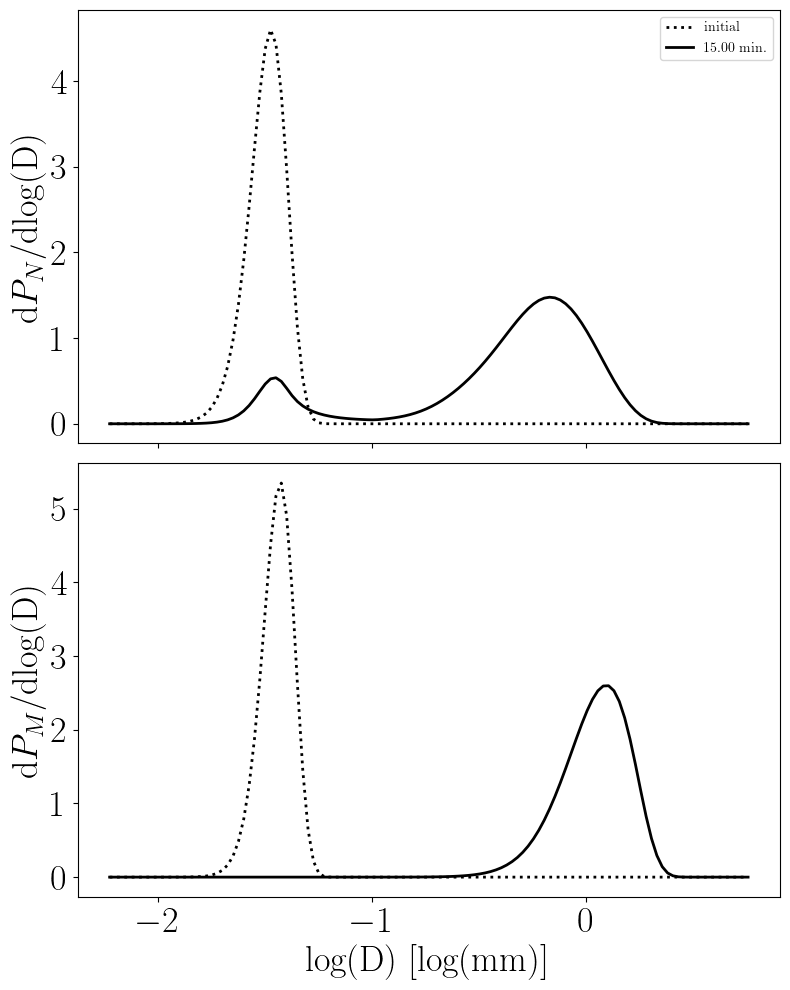

In [12]:
s4_long_2mom = spectral_1d(sbin=4,bins=120,tmax=900.,dt=1.0,Nt0=50e3,Mt0=0.001,x0=1e-10,mu0=2.,kernel='Long',Ecol=1.0,Es=1.0,gam_norm=True,dist_var='mass',moments=2)
s4_long_2mom.run()
s4_long_2mom.plot_dists(-1,x_axis='size',normbin=True)

Notice that we plot here with the ```normbin``` parameter which normalizes the number distribution function by $N_{t}$ and the mass distribution function by $M_{t}$ (this helps because cloud droplet concentrations are much higher than for rain). Now let's see what the corresponding 1 moment run looks like.

Running 1D spectral bin model:   0%|          | 0/900 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.14 min
Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='d$P_{N}$/dlog(D)'>,
        <Axes: xlabel='log(D) [log(mm)]', ylabel='d$P_{M}$/dlog(D)'>],
       dtype=object))

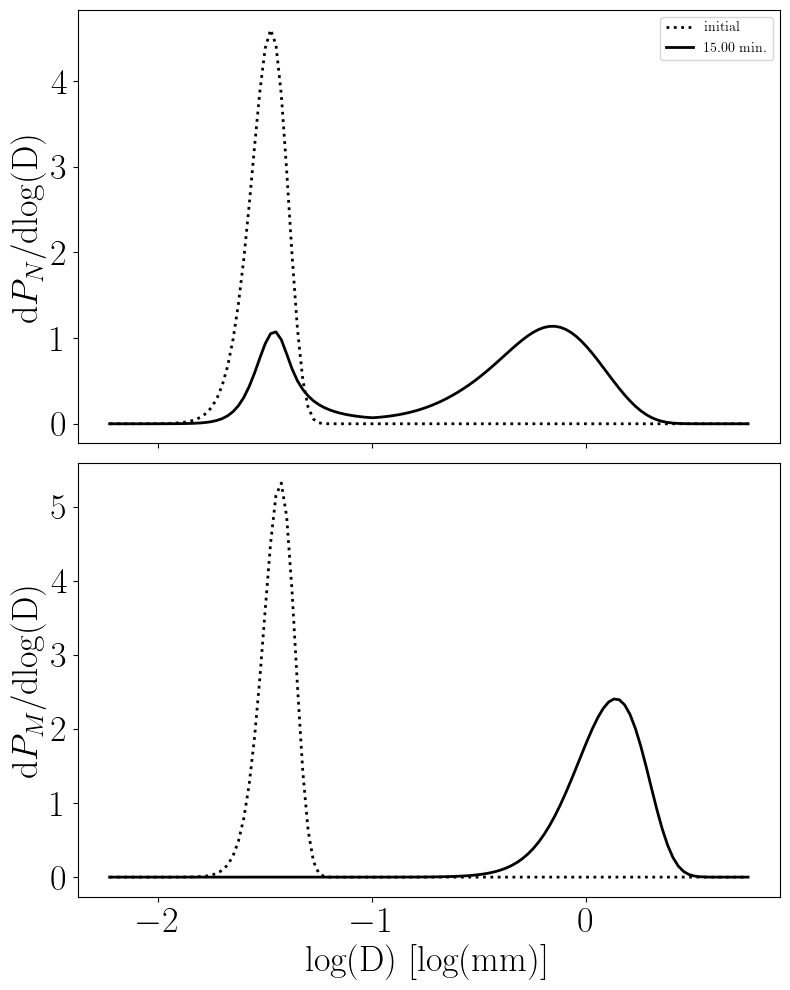

In [13]:
s4_long_1mom = spectral_1d(sbin=4,bins=120,tmax=900.,dt=1.0,Nt0=50e3,Mt0=0.001,x0=1e-10,mu0=2.,kernel='Long',Ecol=1.0,Es=1.0,gam_norm=True,dist_var='mass',moments=1)
s4_long_1mom.run()
s4_long_1mom.plot_dists(-1,x_axis='size',normbin=True)

Notice that even with $s_{\mathrm{bin}}=4$, the single moment run is noticeably more diffusive for sizes that are greater than or around 1 mm. 